In [79]:
import pandas as pd
import yaml
import importlib
import harmonics, midi
def rel():
    importlib.reload(harmonics)
    importlib.reload(midi)
from mido import MidiFile
import mido
import os
import datetime
import numpy as np

In [2]:
rel()

In [3]:
harmonics.Melody('arp_M7',ref_note='Bb')

[Bb, D, F, A]

In [4]:
harmonics.Note('C').append(harmonics.Note('C'))

[C, C]

In [5]:
mid = MidiFile('jazzmidi/2_of_a_kind_jp.mid',clip=True)

In [161]:
di = {k:0 for k in set(df['key_signature'])}

In [162]:
for key in df.key_signature:
    di[key] += 1

In [164]:
import matplotlib.pyplot as plt

In [176]:
df.describe()

,set_tempo
count,770.000000
mean,124.480519
std,43.370245
min,8.000000
25%,94.000000
50%,120.000000
75%,145.000000
max,324.000000


In [170]:
df_keys = pd.Series(di.values(),index=di.keys())

In [172]:
df_keys.sort_values(inplace=True)

<BarContainer object of 16 artists>

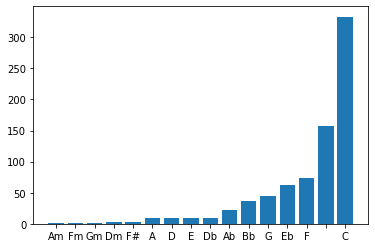

In [174]:
plt.bar(range(len(df_keys)),df_keys,tick_label=df_keys.index)

In [8]:
class MidiAnalyzer():
    def __init__(self,folder,clip=True):
        self.MIDI = {}
        for file in os.listdir(folder):
            if '.mid' in file:
                self.MIDI[file] = MidiFile(os.path.join(folder,file),clip=clip)
        self.files = list(self.MIDI.keys())
        self.name = [[vars(a)['name'] for a in self.MIDI[f].tracks[0] if vars(a)['type']=='track_name'] for f in self.files]
        self.text = [[vars(a)['text'] for a in self.MIDI[f].tracks[0] if vars(a)['type']=='text'] for f in self.files]

In [9]:
start = datetime.datetime.timestamp(datetime.datetime.now())
foldermidi = MidiAnalyzer('jazzmidi')
end = datetime.datetime.timestamp(datetime.datetime.now())
print(f"Took {end-start} seconds")

Took 56.80321288108826 seconds


In [156]:
foldermidi